In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Blood Cell Count

* RBCs — red blood cells
* WBCs — white blood cells

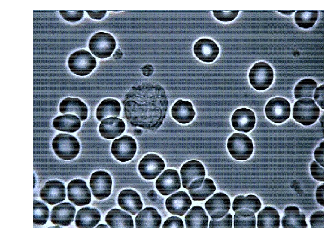

In [2]:
img = cv2.imread('images/1.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

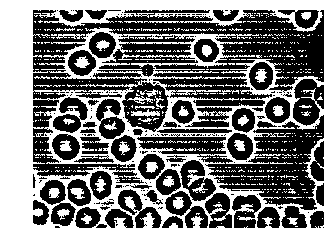

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(thresh, cmap='gray')

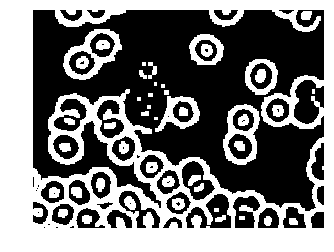

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.axis('off')
plt.imshow(unknown, cmap='gray')

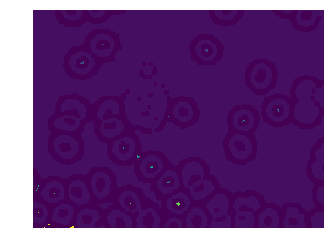

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.axis('off')
plt.imshow(markers)

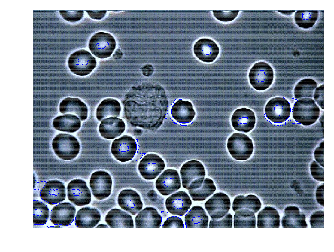

In [6]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

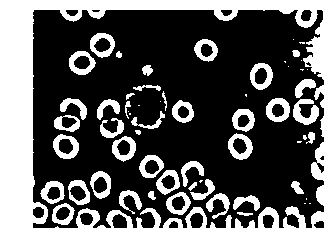

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (15,15), 0)
_, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh, cmap='gray')

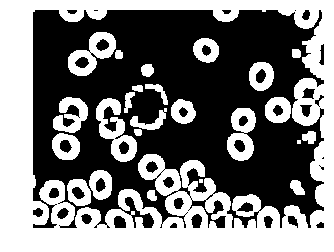

In [8]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.axis('off')
plt.imshow(unknown, cmap='gray')

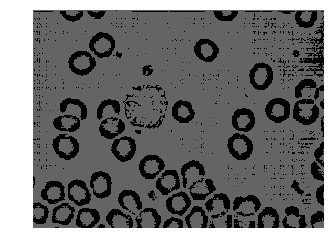

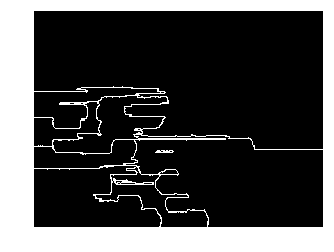

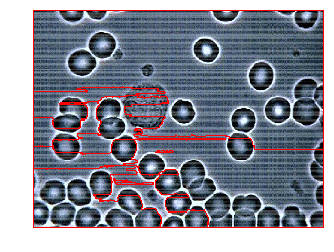

In [9]:
import sys
from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255/ncc)
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = lbl.astype(np.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(np.uint8)
    return 255 - lbl


img = cv2.imread('images/1.jpg')

# Pre-processing
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
_, img_bin = cv2.threshold(img_gray, 50, 100,
        cv2.THRESH_BINARY)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, # MORPH_OPEN
        np.ones((3, 3), dtype=int))

result = segment_on_dt(img, img_bin)

result[result != 255] = 0
result = cv2.dilate(result, None)
img[result == 255] = (0, 0, 255)

plt.axis('off')
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_GRAY2RGB))
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

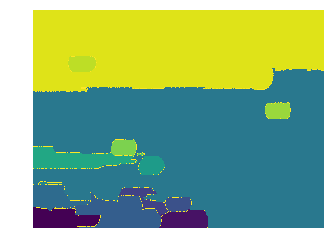

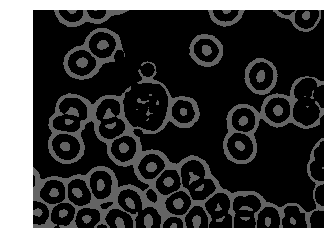

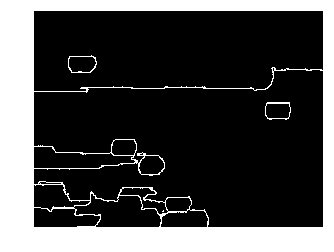

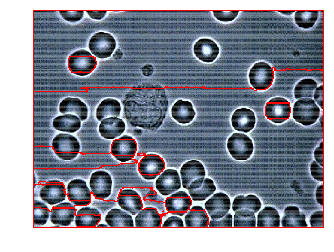

In [10]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (21,21), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
#sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
#sobelx_scale = cv2.convertScaleAbs(sobelx)
#sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
#sobely_scale = cv2.convertScaleAbs(sobely)

#grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

_, th = cv2.threshold(gray, 50, 100, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Pre-processing.
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
#_, img_bin = cv2.threshold(img_gray, 0, 255,
#        cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(th, cv2.MORPH_OPEN, # MORPH_OPEN
       np.ones((3, 3), dtype=int))

result = segment_on_dt(src, img_bin)

plt.axis('off')
plt.imshow(result)

result[result != 255] = 0
result = cv2.dilate(result, None)
src[result == 255] = (0, 0, 255)

plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(th, cv2.COLOR_GRAY2RGB))
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()

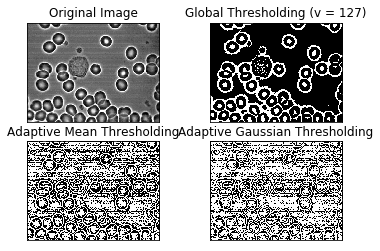

In [11]:
image_normal= cv2.imread('images/1.jpg')

image_normal=cv2.cvtColor(image_normal,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(image_normal,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

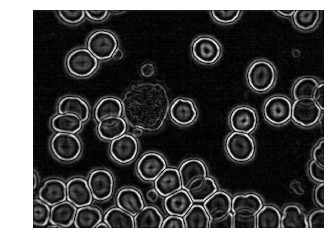

In [12]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (15,15), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

plt.axis('off')
plt.imshow(grade_weighted, cmap='gray')

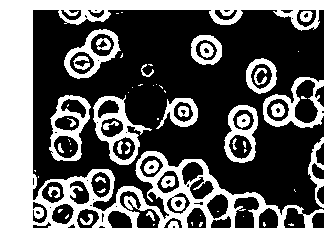

In [13]:
processed = cv2.GaussianBlur(grade_weighted, (15,15), 0)
_, th = cv2.threshold(processed, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, cmap='gray')

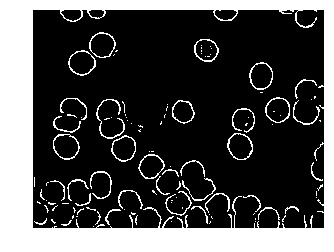

In [14]:
img = cv2.imread('images/1.jpg')
blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
th = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV, 11, 5)

plt.axis('off')
plt.imshow(th, 'gray')

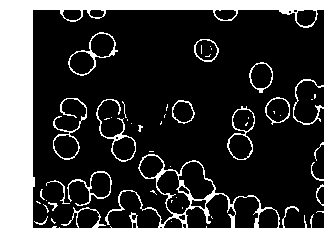

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

plt.axis('off')
plt.imshow(closed, 'gray')

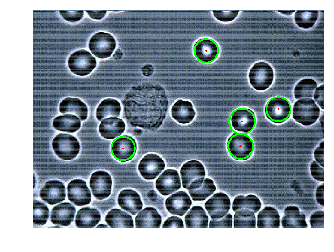

In [16]:
src = img.copy()
rows = closed.shape[0]
circles = cv2.HoughCircles(closed, cv2.HOUGH_GRADIENT, 1, rows / 10, 
                           param1=100, param2=30, minRadius=15, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

43


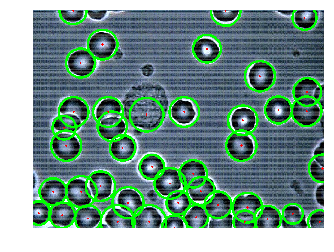

In [17]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (15,15), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

rows = grade_weighted.shape[0]
circles = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15, # / 10
                           param1=100, param2=30, minRadius=23, maxRadius=50)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 5)
    
print(circles.shape[1])

plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

46


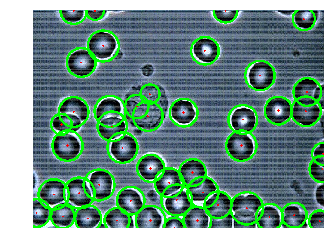

In [18]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (13,13), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

plt.axis('off')
plt.imshow(grade_weighted, cmap='gray')

rows = grade_weighted.shape[0]
circles = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15, # / 10
                           param1=100, param2=30, minRadius=23, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 255, 0), 5)
    
print(circles.shape[1])

plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

41


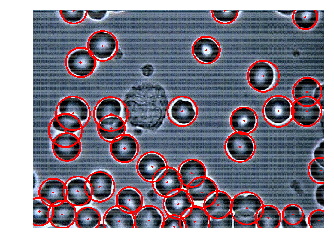

In [19]:
src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (17,17), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

plt.axis('off')
plt.imshow(grade_weighted, cmap='gray')

rows = grade_weighted.shape[0]
circles = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15, # / 10
                           param1=100, param2=30, minRadius=23, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (0, 0, 255), 3)
    
print(circles.shape[1])

plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

41
1


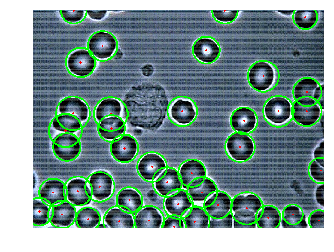

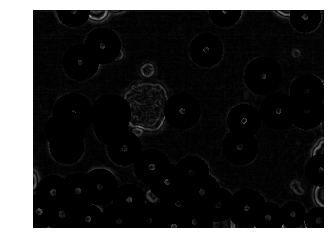

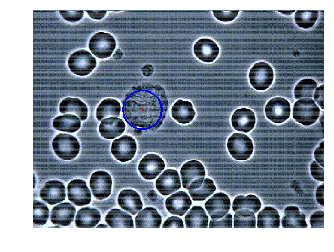

In [20]:
# объединить в одно итоговое изображение
# попробовать на других
src1 = cv2.imread('images/1.jpg')
src2 = src1.copy()
blur = cv2.GaussianBlur(src1, (17,17), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

rows = grade_weighted.shape[0]
rbcs = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15, # / 10
                           param1=100, param2=30, minRadius=23, maxRadius=50)

without_rbcs = grade_weighted.copy()
if rbcs is not None:
    rbcs = np.uint16(np.around(rbcs))
    for i in rbcs[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src1, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src1, center, radius, (0, 255, 0), 3)
        # fill rbc
        cv2.circle(without_rbcs, center, (radius // 2) + 10, (0, 0, 0), radius)
    
print(rbcs.shape[1])

plt.axis('off')
plt.imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))

plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(without_rbcs, cv2.COLOR_GRAY2RGB))

rows = without_rbcs.shape[0]
wbcs = cv2.HoughCircles(without_rbcs, cv2.HOUGH_GRADIENT, 1, rows / 15, # / 10
                           param1=100, param2=30, minRadius=51, maxRadius=80)

if wbcs is not None:
    wbcs = np.uint16(np.around(wbcs))
    for i in wbcs[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src2, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src2, center, radius, (255, 0, 0), 3)
    
print(wbcs.shape[1])

plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))

23


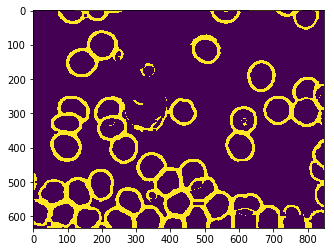

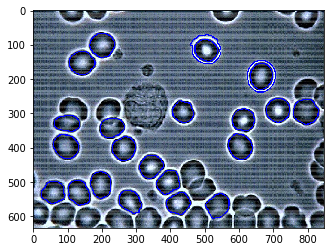

In [21]:
# не работает с "кусочками" кругов

src = cv2.imread('images/1.jpg')
blur = cv2.GaussianBlur(src, (15,15), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobelx_scale = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobely_scale = cv2.convertScaleAbs(sobely)

grade_weighted = cv2.addWeighted(sobelx_scale, 0.5, sobely_scale, 0.5, 0)

# Find edges
edge_detected_image = cv2.Canny(grade_weighted, 75, 200) #  75, 200
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
edge_detected_image = cv2.morphologyEx(edge_detected_image, cv2.MORPH_CLOSE, kernel)

# Find contours
_, contours, _= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    #approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    circularity = 4 * np.pi * (cv2.contourArea(contour) / (cv2.arcLength(contour,True) * cv2.arcLength(contour,True)))
    area = cv2.contourArea(contour)
    # if ((8 <= len(approx) <= 23) & (cv2.isContourConvex(approx))): 70 < area < 150, len > 8 but < 23
    if ((8 <= len(approx) <= 23) & (circularity > 0.8) & (900 <= area)):
        contour_list.append(contour)
        
# Draw contours
cv2.drawContours(src, contour_list, -1, (255,0,0), 2)

plt.imshow(edge_detected_image)    
plt.figure()
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
print(len(contour_list))

31


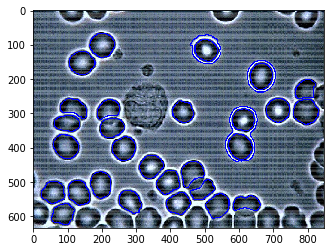

In [22]:
src = cv2.imread('images/1.jpg')

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    #approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    circularity = 4 * np.pi * (cv2.contourArea(contour) / (cv2.arcLength(contour,True) * cv2.arcLength(contour,True)))
    area = cv2.contourArea(contour)
    # if ((8 <= len(approx) <= 23) & (cv2.isContourConvex(approx))): 70 < area < 150, len > 8 but < 23
    # circularity of a square is 0.785, and so on.
    if ((8 <= len(approx) <= 23) & (circularity > 0.6) & (1200 <= area)):
        contour_list.append(contour)
        
# Draw contours
cv2.drawContours(src, contour_list, -1, (255,0,0), 2)
   
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
print(len(contour_list))

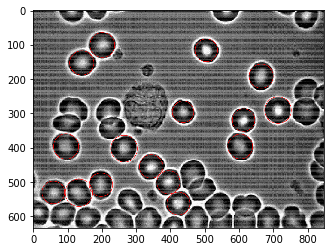

In [23]:
# Read image
im = cv2.imread('images/1.jpg', 0)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(grade_weighted)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))

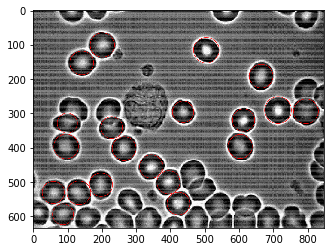

In [24]:
# Read image
im = cv2.imread('images/1.jpg', 0)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.7

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5 # params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(grade_weighted)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))

In [25]:
def detect_and_count_blood_cells_from_colored(img):
    img_copy = img.copy()
    blur = cv2.GaussianBlur(img, (17,17), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobelx_scale = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobely_scale = cv2.convertScaleAbs(sobely)
    
    grade_weighted = cv2.addWeighted(sobelx_scale, 2, sobely_scale, 2, 0)
    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(grade_weighted, cv2.COLOR_GRAY2RGB))
    plt.figure()
    
    rows = grade_weighted.shape[0]
    rbcs = cv2.HoughCircles(grade_weighted, cv2.HOUGH_GRADIENT, 1, rows / 15,
                            param1=100, param2=30, minRadius=23, maxRadius=50)

    grade_weighted_without_rbcs = grade_weighted.copy()
    
    if rbcs is not None:
        rbcs = np.uint16(np.around(rbcs))
        for i in rbcs[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img_copy, center, 1, (0, 0, 255), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img_copy, center, radius, (0, 255, 0), 3)
            # fill rbc
            cv2.circle(grade_weighted_without_rbcs, center, (radius // 2) + 10, (0, 0, 0), radius)
            
    print('RBC count: %i' % (0 if rbcs is None else rbcs.shape[1]))
    
    
    rows = grade_weighted_without_rbcs.shape[0]
    wbcs = cv2.HoughCircles(grade_weighted_without_rbcs, cv2.HOUGH_GRADIENT, 1, rows / 15, 
                            param1=100, param2=30, minRadius=51, maxRadius=80)

    if wbcs is not None:
        wbcs = np.uint16(np.around(wbcs))
        for i in wbcs[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img_copy, center, 1, (0, 0, 255), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img_copy, center, radius, (255, 0, 0), 3)
    
    print('WBC count: %i' % (0 if wbcs is None else wbcs.shape[1]))
    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

RBC count: 27
WBC count: 0


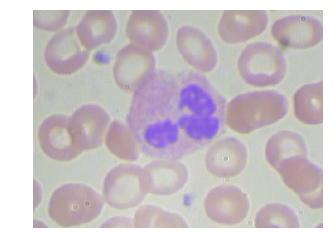

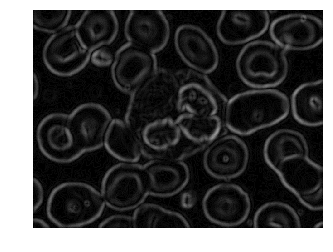

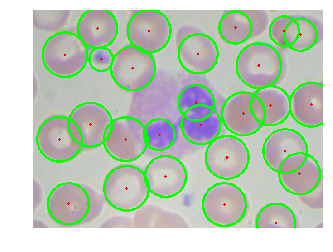

In [26]:
img = cv2.imread('images/Complete-Blood-Cell-Count-Dataset/Testing/Images/BloodImage_00339.jpg')

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()

detect_and_count_blood_cells_from_colored(img)

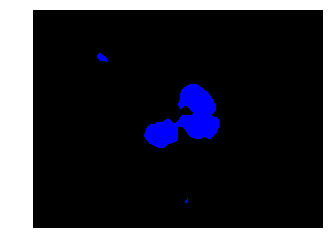

In [27]:
img = cv2.imread('images/Complete-Blood-Cell-Count-Dataset/Testing/Images/BloodImage_00339.jpg')
z = img.reshape((-1,3))

z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, label, center = cv2.kmeans(z, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
kmean = center[label.flatten()].reshape((img.shape))

_, kmean_th = cv2.threshold(kmean, 200, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(cv2.cvtColor(kmean_th, cv2.COLOR_BGR2RGB))

WBC count: 3


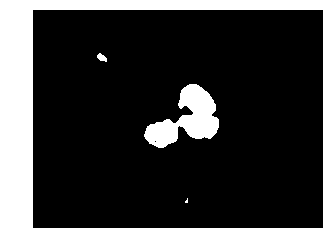

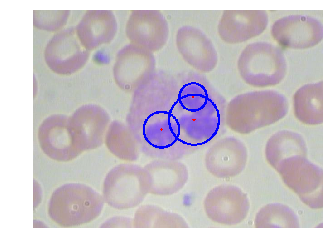

In [28]:
kmean_th_gray = cv2.cvtColor(kmean_th, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(kmean_th_gray, cmap='gray')

rows = kmean_th_gray.shape[0]
wbcs = cv2.HoughCircles(kmean_th_gray, cv2.HOUGH_GRADIENT, 2, rows / 20, 
                        param1 = 100, param2 = 35, minRadius = 0, maxRadius = 0)

img_copy = img.copy()
if wbcs is not None:
    wbcs = np.uint16(np.around(wbcs))
    for i in wbcs[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img_copy, center, 1, (0, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_copy, center, radius, (255, 0, 0), 3)

print('WBC count: %i' % (0 if wbcs is None else wbcs.shape[1]))

plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

1


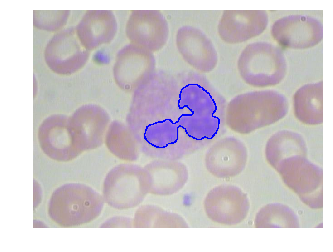

In [29]:
src = cv2.imread('images/Complete-Blood-Cell-Count-Dataset/Testing/Images/BloodImage_00339.jpg')
_, contours, _ = cv2.findContours(kmean_th_gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
# TODO: add check for None
for contour in contours:
    area = cv2.contourArea(contour)
    if (area > 300):
        contour_list.append(contour)
        
# Draw contours
cv2.drawContours(src, contour_list, -1, (255,0,0), 2)
   
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
print(len(contour_list))

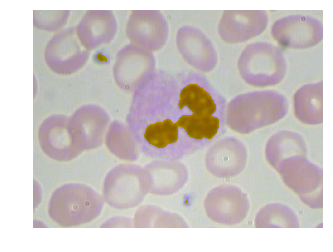

In [30]:
sub_img = cv2.subtract(img, kmean_th)
plt.axis('off')
plt.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))

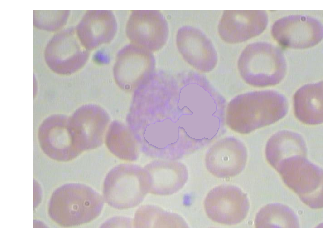

In [31]:
src = cv2.imread('images/Complete-Blood-Cell-Count-Dataset/Testing/Images/BloodImage_00339.jpg')
cv2.drawContours(src, contour_list, -1, (196,168,188), cv2.FILLED)

plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

# TODO: fill gradient image with black color using circles (from kmean_th_gray)

RBC count: 26
WBC count: 0


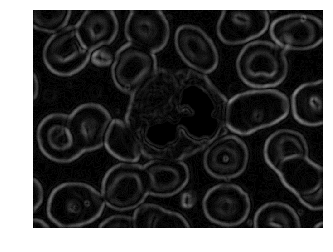

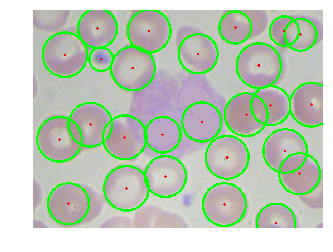

In [32]:
detect_and_count_blood_cells_from_colored(src)